# Gemini pdf demo

## Setup

In [2]:
!pip install -Uq google-generativeai

In [1]:
import google.generativeai as genai
import os
import pathlib
import tqdm

from dotenv import load_dotenv

load_dotenv()

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

## PDF tool to display page

PDF processing tools, no need to use the api, just to display a screenshot of a page.

In [ ]:
!sudo apt install poppler-utils

## Download PDF

In [5]:
if not pathlib.Path('test.pdf').exists():
  !curl -o test.pdf https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf

!ls -ltr |grep test.pdf

-rwxrwxrwx 1 oldhorse oldhorse   7228817 Jul 28 15:25 test.pdf


Look at one of the pages:

In [15]:
!pdftoppm test.pdf -f 3 -l 5 page-image -jpeg
!ls | grep page-image

page-image-01.jpg
page-image-03.jpg
page-image-04.jpg
page-image-05.jpg


In [7]:
import PIL.Image

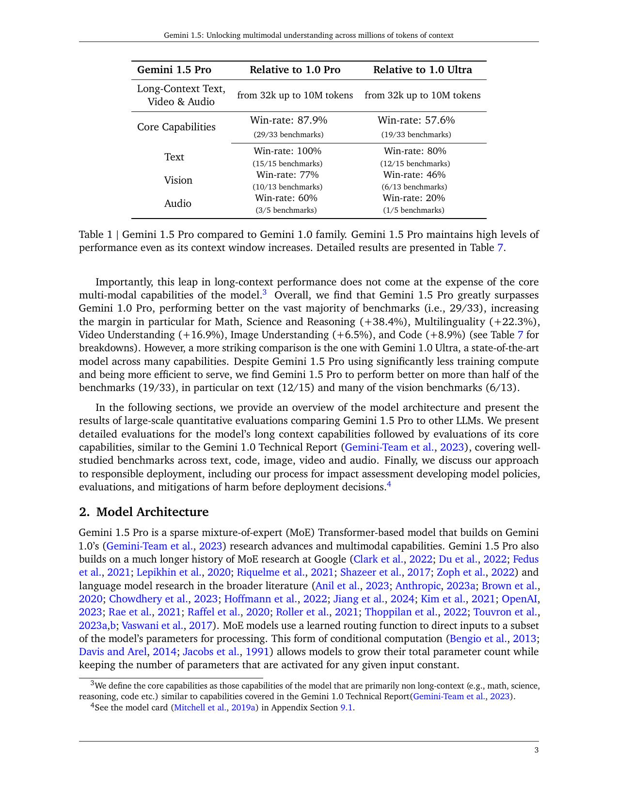

In [16]:
img = PIL.Image.open(f"page-image-03.jpg")
img.thumbnail([800, 800])
img

## Upload the file to the API

In [17]:
pdffile = genai.upload_file('test.pdf')

In [18]:
model = genai.GenerativeModel(model_name='gemini-1.5-flash')

The pages of the PDF file are each passed to the model as a screenshot of the page plus the text extracted by OCR.

In [19]:
model.count_tokens([pdffile, "please summarize the file"])

total_tokens: 78591

In [27]:
response = model.generate_content(
    [pdffile, '\n\nplease summarize file as a bulleted list around 10 most important points']
)

In [28]:
from IPython.display import Markdown
Markdown(response.text)

Here are the 10 most important points from the Gemini 1.5 paper:

- **Gemini 1.5 Pro is a highly compute-efficient multimodal mixture-of-experts model capable of recalling and reasoning over fine-grained information from millions of tokens of context.** This includes long documents, hours of video, and days of audio.
- **Gemini 1.5 Pro achieves near-perfect recall on long-context retrieval tasks across modalities, and improves the state-of-the-art in long-document QA, long-video QA, and long-context ASR.**
- **Gemini 1.5 Pro pushes the boundary of efficiency, reasoning, and long-context performance.** It handles up to 10M tokens, a significant leap over existing models.
- **Gemini 1.5 Pro can learn to translate English to Kalamang, a language with fewer than 200 speakers worldwide.** This highlights the surprising new capabilities of large language models at the frontier.
- **Gemini 1.5 Pro greatly surpasses Gemini 1.0 Pro on the vast majority of benchmarks, and also performs at a similar level to 1.0 Ultra on a wide array of benchmarks.**
- **Gemini 1.5 Pro has strong long-context capabilities that are demonstrably effective for a range of tasks.** This includes text, video, and audio, as well as realistic applications like long-document QA and in-context learning.
- **Gemini 1.5 Pro demonstrates improved safety performance compared to its predecessors.** This includes mitigating harmful content, representational harms, and memorization.
- **Gemini 1.5 Pro exhibits a high level of proficiency in core text capabilities, such as math, science, and reasoning.** It also excels in coding, multilinguality, and instruction following.
- **Gemini 1.5 Pro exhibits a high level of proficiency in core vision and audio capabilities.** This includes image understanding, video understanding, and speech recognition.
- **Gemini 1.5 Pro is being deployed responsibly.** Google is committed to a structured approach to responsible deployment that includes impact assessment, evaluation, mitigation, and deployment.